In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style='whitegrid')

In [4]:
with open('demo_hist/emollm_demo_hist.pickle', 'rb') as f:
    emo = pickle.load(f)

with open('demo_hist/llm_attacks_demo_hist.pickle', 'rb') as f:
    attacks = pickle.load(f)

with open('/dlabdata1/boronski/llm-attacks/demo_hist/emollm_demo_hist_4.28.1_0.2.20.pickle', 'rb') as f:
    emo_old_libs = pickle.load(f)

with open('/dlabdata1/boronski/llm-attacks/demo_hist/emollm_demo_hist_4.28.1_0.2.34.pickle', 'rb') as f:
    emo_old_transformers = pickle.load(f)

# cant do old fschat with new transformers, dependencies error

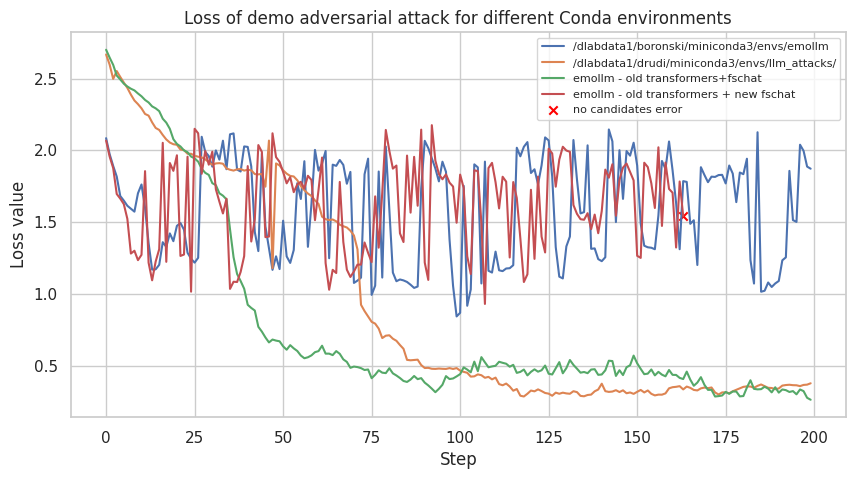

In [18]:
emo_loss = np.hstack(emo["loss"])
attacks_loss = np.hstack(attacks["loss"])

plt.figure(figsize=(10, 5))
plt.title("Loss of demo adversarial attack for different Conda environments")
plt.plot(emo_loss, alpha=1, label="/dlabdata1/boronski/miniconda3/envs/emollm")
plt.plot(attacks_loss, alpha=1, label="/dlabdata1/drudi/miniconda3/envs/llm_attacks/")
plt.plot(emo_old_libs["loss"], alpha=1, label="emollm - old transformers+fschat")
plt.plot(emo_old_transformers["loss"], alpha=1, label="emollm - old transformers + new fschat")
plt.scatter(list(range(len(emo_old_transformers["loss"])))[-1], emo_old_transformers["loss"][-1], marker='x', color='red', label="no candidates error")
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.legend(fontsize=8)
plt.show()